# **Plant Health Check**

# **Introduction**

<image src="https://i.pinimg.com/564x/3a/9e/8d/3a9e8d19bdccc7cf81701481d7040a0c.jpg" height="400">



The COVID-19 pandemic has increased the time people spend indoors. A large population of Millennials have started growing house plants as a recreational activity (Dzhambov et.al, 2021). The sales of house plants have doubled over the last three years (Rawal and Gabrani, 2020). As of 2019, the indsutry is valued at $1.7 billion (Rawal and Gabrani, 2020). Americans spend 90% of their time indoors, and taking care of plants has become a new recreational activity (Davidoff, 2021). Along with a hobby, caring for plants has also proved to relieve stress (Davidoff, 2021).

Planting is such a lucrative industry and novice plant owners may not fully care for the plants. There are many advantages of indoor plants. Indoor spaces, not only include houses but also in schools. A 9 week study in Portugal showed that air quality improved with the presence of indoor plants, decreasing carbondioxide percentages in the air (Pegas et.al, 2012). Additional research showed that ornamental plants in offices, to a certain extent, contributed to the environment of the workplace and employee behavior (Thomsen et.al, 2011).

There is constant generation of carbondioxide in indoor settings through physical activity, human metabolism, and body size (Persily, 2017). In particular, there is more generation of carbondioxide in buildings (Persily, 2017). High carbondioxide generation combined with low relative humidity results in health issues (Gubb et.al, 2018). The study concluded that certain houseplants were effective in removing carbondioxide (Gubb et.al, 2018). However, if houseplants are not cared for effectively, they can potentially be dangerous to the environment. According to a study in Tapei, Taiwan, there is no link between the presence of houseplants and lack of disease (Chen et.al, 2019). Therefore, it is important to ensure that houseplants are properly cared for in their environment.

Houseplants are only effective to clean formaldehyde, substance that pollutes the environment, when the plant is in good health (Panyametheekul et.al, 2018). There is no substantial research about the impact of unhealthy plants on indoor air quality. However, to encourage the better health of their plants and prevent the risk of leading to an unhealthy condition, we want to build a classification model that would monitor the health of the plants. Our model will also fit into the larger piece to help owners better understand their plant’s needs and grow their plant collection through gamification. Silos, an interactive system that incentivizes people to take care of their plants, showed many benefits (Penders et.al, 2018). The process were more enjoyable (Pernders et.al, 2018). By adding an image classification aspect to the already existing gamified experience of plant caring, our goal is to provide a more robust experience for plant owners.

<image src="https://stockslagers.com/wp-content/uploads/2020/01/man-taking-photo-of-white-petaled-flowers-3228762-1020x600.jpg?80568d&80568d" height="400">

## **Business Problem**

Our target is to predict if the given image is of a healthy plant or an unhealthy plant. Using this feature, we want to help novice plant owners to take care of their plants. After reviewing the health of the plants, our application will provide them suggestions to improve the health of a plant. For example, a plant with yellow leaves could be beause of overwatering and therefore we would suggest them to give less water to the plant in regular intervals based on the plant type. 

# **Data Extraction**

In [ ]:
# mount google drive
from google.colab import drive, files
drive.mount('/content/drive/')


Mounted at /content/drive/


# **Import All Modules**

In [ ]:
# importing necessary modules
import keras
keras.__version__

'2.8.0'

In [ ]:
from PIL import Image
import os
from google.colab import files
import time

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns


import tensorflow as tf
from keras.preprocessing import image
from keras import callbacks
from keras import models
from keras import layers
from keras import optimizers
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

In order to work on the business problem, we created our own dataset. We created a directory that contains images of two classes - unhealthy plants and healthy plants. We used web-scraping script provided to get our data using keywords such as “Unhealthy Houseplants" or "Dead Houseplants" or "Dead plants” to create a directory of **Un-healthy houseplants** and used keywords such as "Healthy Houseplants” or "Healthy plants" to create a directory for **Un-healthy plants**.

Using web-scrapping, we downloaded 1200 images each for both directories and saved it in our shared drive. After saving the images, we manually selected 500 images each for unhealthy and healthy plants to remove gifs, duplicates and check the sanity of the downloaded images using webscrapping. 

The pictures are medium-resolution color JPEGs. They look like this:






<image src="https://smartgardenguide.com/wp-content/uploads/2021/04/overwatering-vs-underwatering-2.jpg" height="400">


In [ ]:
## Note: - the following code is used from the No-limit extraction file provided in module 3.3
! git clone https://github.com/Joeclinton1/google-images-download.git
cd google-images-download

!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

from selenium import webdriver
options = webdriver.ChromeOptions()

# set options to be headless, ..
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',options=options)
wd.get("https://stackoverflow.com/questions/51046454/how-can-we-use-selenium-webdriver-in-colab-research-google-com")
wd.title


import shutil
shutil.move("/content/drive/Shareddrives/Deep Learning Team Project/Data Extraction/Healthy Houseplants", "/content/drive/Shareddrives/Deep Learning Team Project/Data Extraction/")
# remember to change the path to make it works


# People without mask
from google_images_download import google_images_download   #importing the library

response = google_images_download.googleimagesdownload()   #class instantiation

arguments = {"keywords":"House Plant","limit":1200,
            "print_urls":True,
            "chromedriver": "/usr/bin/chromedriver"
            }   #creating list of arguments
paths = response.download(arguments)   #passing the arguments to the function
print(paths)   #printing absolute paths of the downloaded images


#import shutil
#shutil.move("/content/google-images-download/downloads/House Plant", "/content/drive/Shareddrives/Deep Learning Team Project/Data Extraction/Houseplants")
# remember to change the path to make it works

# **Creating Custom Functions**

## **Rename**

In [ ]:
## Function to rename files

def rename_files(dir_list):

  ''''
  This function will attempt to do the following
  
  For each directory in dir_list
  1) Move files to Final directory
  2) Rename them
  3) Convert all to .jpg

  While writting over to new directory, we will first delete all files at the destination,
  so that there are no duplicate names. 
  
  Final destination will have suffix '_Final'

  '''
  ## Binary classes
  plant_condition = ['Healthy','Unhealthy']

  ## Select a directory from the list
  for directory in dir_list:
    for condition in plant_condition:
      ## Make source and destination paths 
      dir_from = directory + '/' + condition + '/'
      dir_to = directory + '_Final/' + condition + '/'
      
      ## Empty destination folder
      for filename in os.listdir(dir_to):
        os.remove(os.path.join(dir_to,filename))

      ## Initiate loop to rename files to destination
      i = 1
      for filename in os.listdir(dir_from):
          prefix = condition + '_' + str(i) + ".jpg"  
          os.rename(os.path.join(dir_from,filename) , os.path.join(dir_to,prefix))
          i+=1

## **Printing Partition Size**

In [ ]:
## Creating a function to print folder sizes
def print_size(dir_list):

  ''''
  This Function will attempt to:  
  1) Print the number of images in all directories 
  2) Total split of Train, Test and Validation
  '''
  
  for dir in dir_list:
    print(os.path.split(dir)[1],'\n','Healthy:',len(os.listdir(dir + '/Healthy/')),'\t','Unhealthy:',len(os.listdir(dir+ '/Unhealthy/')))
    print(os.path.split(dir)[1] + ' split:',len(os.listdir(dir + '/Healthy/')) + len(os.listdir(dir+ '/Unhealthy/')),'\n')

## **Learning Curves**

In [ ]:
## Plotting Learing curves
def learning_curves(hist):

  ''''
  We will plot all the learning curves using our own function

  Using Seaborn for pretty graphs
  '''
  
  ## Store accuracy and loss from the history object as dataframes for seaborn line plots
  acc = pd.DataFrame({'Training Acc' : hist.history['acc'],
                    'Validation Acc' : hist.history['val_acc']})

  loss = pd.DataFrame({'Training Loss' : hist.history['loss'],
                    'Validation Loss' : hist.history['val_loss']})

  # Get the number of epochs
  epochs = range(len(acc))


  # Plot accuracy
  sns.relplot(data=acc,
              kind = 'line',
              palette = "inferno_r",
              aspect = 2)
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.title("Training and Validation accuracy")
  plt.xticks(epochs)

  plt.figure(1)

  # Plot Loss
  sns.relplot(data=loss,
              kind='line',
              palette = "inferno_r",
              aspect=2)
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.title("Training and Validation Loss")
  plt.xticks(epochs)

  plt.show()




## **Confusion Matrix and Evaluation Report**

In [ ]:
## Printing confusion Matrix and Evaluation report 
def evaluation_metric_gen(model,test_gen):

  ''''
  
  This function will calculate the Confusion matrix as well as other fit statistic

  Again, we will leverage seaborn for this.

  '''
  # Predict our classes using our model
  pred_classes = model.predict(test_gen)

  # Convert them to 0 and 1, if more than 2 classes user argmax
  pred_classes = np.round(pred_classes,0)

  # Get true labels from test data
  true_classes = test_gen.classes
  class_labels = list(test_gen.class_indices.keys()) 

  # Make confusion matrix
  cf_matrix = confusion_matrix(true_classes, pred_classes)

  # Names for prediction classes
  group_names = ['True Neg','False Pos','False Neg','True Pos']

  # get count in each class
  group_counts = ["{0:0.0f}".format(value) for value in
                  cf_matrix.flatten()]

  # get percentage of each class
  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]

  # merge class,count and percentage
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]

  labels = np.asarray(labels).reshape(2,2)

  # Plot Confusion matrix as a heatmat
  ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

  ax.set_title('Confusion Matrix\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['Healthy','Unhealthy'])
  ax.yaxis.set_ticklabels(['Healthy','Unhealthy'])

  ## Display the visualization of the Confusion Matrix.
  plt.show()

  # Print evaluation Report
  report = classification_report(true_classes, pred_classes, target_names=class_labels)
  print('\n',report)    


 

# **Partition Data**

After scarping our data, we finalized 1,000 images of healthy and unhealthy house plants (500 from each class). After downloading, we created a new directories containing three subfolders: a training folder with 350 samples of each class, a validation folder with 100 samples of each class, and a test folder with 50 samples of each class.

We have used a small data set to train the model as convnets learn local. They have translation-invariant features which are highly data efficient on perceptual problems. Training a convnet from scratch on a very small image dataset usually  yield a reasonable result despite a relative lack of data and without the need for any custom feature engineering.

In [ ]:
## Creating Path for each directory 
path = "/content/drive/Shareddrives/Deep Learning Team Project/CNN/Data/" 
train_tmp = path + "Train"
validation_tmp = path + "Validation"
test_tmp = path + "Test"

train_dir = train_tmp + '_Final'
validation_dir = validation_tmp + '_Final'
test_dir = test_tmp + '_Final'

In [ ]:
## Store them as a list to reference in loops
directories = [train_tmp,validation_tmp,test_tmp]

## Directories for processed data
final_directories = [train_dir,validation_dir,test_dir]

# **Running our custom functions on Partitioned Data**

## **_Important Note_**

> **_Run The Next Block Only Once For Renaming Files_**

Using the custom functions we created above, we renamed all the images such that there are no duplicate names. Additionally, we converted all images into .jpg as .jpg file is compatible with python.

In [ ]:
# Rename and convert all files
rename_files(directories)

In [ ]:
#Printing size of directories
print_size(final_directories)

Train_Final 
 Healthy: 350 	 Unhealthy: 350
Train_Final split: 700 

Validation_Final 
 Healthy: 100 	 Unhealthy: 100
Validation_Final split: 200 

Test_Final 
 Healthy: 50 	 Unhealthy: 50
Test_Final split: 100 



>**As You can see, we have split our data into:-**

* Train - 700
* Validation - 200
* Test - 100

# **Viewing Our Data**

Before building any machine learning model, one should always check what kind of data they are dealing with. For this, lets try to print our images

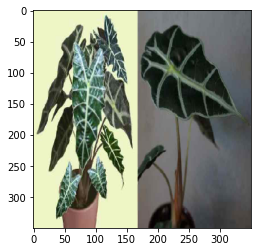

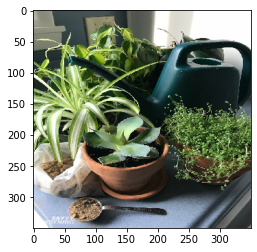

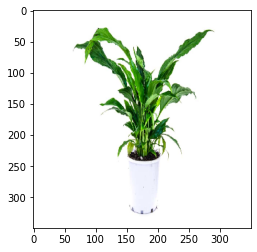

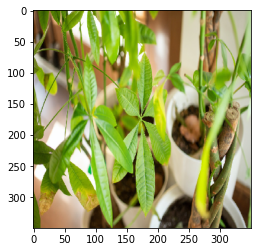

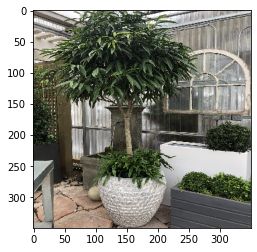

In [ ]:
## Lets see our images before running any models
for i in range(1,6):
  string = (train_dir, '/Healthy/Healthy_',str(i),'.jpg')
  s = ''
  img_path = s.join(string)
  img = image.load_img(img_path, target_size=(350, 350))
  plt.figure(i)
  imgplot = plt.imshow(img)

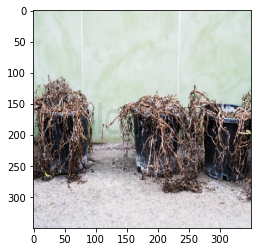

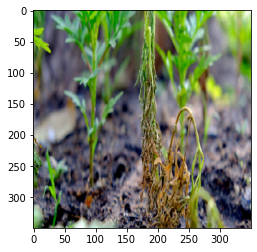

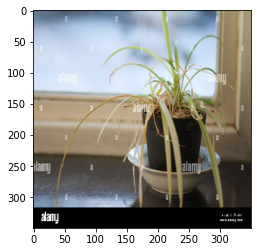

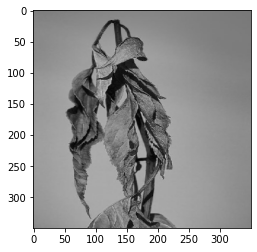

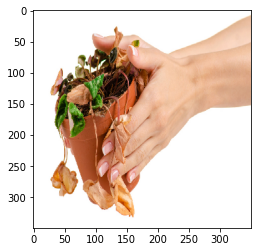

In [ ]:
## Same for Unhealthy
for i in range(1,6):
  string = (train_dir, '/Unhealthy/Unhealthy_',str(i),'.jpg')
  s = ''
  img_path = s.join(string)
  img = image.load_img(img_path, target_size=(350, 350))
  plt.figure(i)
  imgplot = plt.imshow(img)


**To Remove Duplicates**

Data duplication would lead to model overfitting on our training data. For this we need to clean any duplicate images and for the scope of this project we will manually delete duplicate images

One could look at the following code by Elise Landman for automated cleaning.

>Link: https://towardsdatascience.com/finding-duplicate-images-with-python-71c04ec8051

# **Model 1: CNN baseline model**

<image src="https://miro.medium.com/max/1400/1*vkQ0hXDaQv57sALXAJquxA.jpeg" height="400">



A Convolutional Neural Network (ConvNet/CNN) is a deep learning algorithm which takes an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to extract relevant features from the image. The pre-processing required in a ConvNet is much lower as compared to other classification algorithms. 

## Data preprocessing

Before building the architecture of the model, we need to rescale the images such that all images are of same size and are formatted into appropriately pre-processed floating point tensors before being fed into our network.Currently, our data sits on a drive as JPEG files, so the steps for getting it into our network are roughly:

* Read the picture files.
* Decode the JPG content to RBG grids of pixels.
* Convert these into floating point tensors.
* Rescale the pixel values (between 0 and 255) to the [0, 1] interval.

For the baseline model, we have re-sized the image to 150x150 pixels. 

In [ ]:
# All images will be rescaled by 1./255
train_datagen_1 = ImageDataGenerator(rescale=1./255) 
test_datagen_1 = ImageDataGenerator(rescale=1./255)


train_generator_1 = train_datagen_1.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=5,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


#create generators for validation and test
validation_generator_1 = test_datagen_1.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=5,
        class_mode='binary')


test_generator_1 = test_datagen_1.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=5,
        class_mode='binary')

Found 700 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


## Architecture

A CNN typically has three layers: a convolutional layer, a pooling layer, and a fully connected layer. The convolution layer is the core building block of the CNN. It carries the main portion of the network’s computational load. This layer performs a dot product between two matrices, where one matrix is the set of learnable parameters otherwise known as a kernel, and the other matrix is the restricted portion of the receptive field.  Kernel is a 3x3 matrix used in machine learning to extract relevant features from the input image. They're also used in machine learning for 'feature extraction', a technique for determining the most important portions of an image. It moves over the input data, performs the dot product with the sub-region of input data such that the output is enhanced in a certain desirable manner. There Different kernels give different types of feature maps. Kernel weights are originally random which are updated via backpropogation.

The 1st layer is an input layer with image size of 150x150 pixels. Since, we have RGB images (colored image), the channel is considered as 3. For the 1st input layer, number of feature maps are considered as 64 and kernel size is (3x3). The role of the ConvNet is to reduce the images into a form which is easier to process, without losing features which are critical for getting a good prediction. Since, convolution is a linear operation and images are far from linear, non-linearity layers are often placed directly after the convolutional layer to introduce non-linearity to the activation map. We have used relu activation map to bring non-linearity to the layers.

Convolution neural networks have sparse interaction. This is achieved by making kernel smaller than the input e.g., an image can have millions or thousands of pixels, but while processing it using kernel we can detect meaningful information that is of tens or hundreds of pixels. This means that we need to store fewer parameters that not only reduces the memory requirement of the model but also improves the statistical efficiency of the model.

The output shape of the 1st layer is 148x148 and has 1792 pixels. Max pooling layer then reduces the dimensions of each feautre map created in the previous convolutional layer. After 1st max pooling layer, the size of each featured map is reduced to 74x74 pixel. This process of passing data through convolution and pooling layer successively is repeated as per the design of CNN model.

Now that we have converted our input image into a suitable form for our Multi-Level Perceptron, we have flattened the image into a column vector. The flattened output is fed to a feed-forward neural network and backpropagation applied to every iteration of training. We have added a dense layer with 40 hidden layers. The final output layer has 1 unit. We have used sigmoid activation because it is a classification problem and sigmoid takes a real-valued number and “squashes” it into a range between 0 and 1.  








In [ ]:
model_1 = models.Sequential()
model_1.add(layers.Conv2D(64, (3, 3), activation='relu',
                          # Input layer will create 64 feature maps using a kernel of size 3x3.
                        input_shape=(150, 150, 3))) # input size needs to match with our data prep. channel 3 for RGB images.
model_1.add(layers.MaxPooling2D((2, 2))) # Max pooling is used to reduce the dimension of each feature map.  
model_1.add(layers.Conv2D(32, (3, 3), activation='relu')) #relu helps to prevent the exponential growth in the computation required to operate the neural network.
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(128, (3, 3), activation='relu')) # layer with 128 feature maps
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(128, (3, 3), activation='relu')) # layer with 128 feature maps
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Flatten()) # Flatten layer
model_1.add(layers.Dense(40, activation='relu')) # hidden layer with 40 units 
model_1.add(layers.Dense(1, activation='sigmoid')) # output layer with 1 unit. sigmoid takes a real-valued number and “squashes” it into a range between 0 and 1 

Let's take a look at how the dimensions of the feature maps change with every successive layer:

In [ ]:
model_1.summary() #printing summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       36992     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

## Compile

While compiling the model, we have used `Adam` optimizer which uses estimations of first and second moments of gradient to adapt the learning rate for each weight of the neural network. The Adam optimizer a replacement optimization algorithm for stochastic gradient descent for training deep learning models. Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems. Adam optimizer trains the neural network in less time and more efficiently. Additionaly, since we ended our network with a single sigmoid unit, we will use binary crossentropy as our loss.

In [ ]:
model_1.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['acc']) #complining the model

## Fit Model

While fitting the model, we have used earlystopping such that the model stops training once the model performance stops improving on a hold out validation dataset.

Further, we have used epochs as 100 which means that the learning algorithm will work 100 times through the enitre training set and every epoch will have 70 random training samples  



In [ ]:


start = time.time() # To check the time taken to complete the fitting process 

es = EarlyStopping(monitor='val_acc', mode='max',
                   #monitoring the validation accuracy to obtain max 
                   patience=10, # batch size 
                   verbose=1,
                   restore_best_weights=True)

# We have used model.fit instead of model.fit_generator function as google colab is in the process to deprecate model.fit_generator function.
history_1 = model_1.fit(
      train_generator_1,
      steps_per_epoch=70, 
      # the quotient of total training samples by batch size chosen. We have 700 images in training with a batch size of 10, 700/10= 70)
      epochs=100, 
      # the number times that the learning algorithm will work through the entire training dataset
      validation_data=validation_generator_1,
      validation_steps=5, # validation steps 
      callbacks= [es]
      # callbak for early stopping)  

end = time.time() # To check the time taken to complete the fitting process
print(end - start) # Print the time taken to complete the fitting process

Epoch 1/100
70/70 [==============================] - 73s 1s/step - loss: 0.6977 - acc: 0.5057 - val_loss: 0.6911 - val_acc: 0.4800
Epoch 2/100
70/70 [==============================] - 41s 580ms/step - loss: 0.6480 - acc: 0.5943 - val_loss: 0.6282 - val_acc: 0.5600
Epoch 3/100
70/70 [==============================] - 45s 646ms/step - loss: 0.6672 - acc: 0.6686 - val_loss: 0.6660 - val_acc: 0.6800
Epoch 4/100
70/70 [==============================] - 24s 353ms/step - loss: 0.5898 - acc: 0.6886 - val_loss: 0.6340 - val_acc: 0.6800
Epoch 5/100
70/70 [==============================] - 20s 290ms/step - loss: 0.4786 - acc: 0.8000 - val_loss: 0.5142 - val_acc: 0.6800
Epoch 6/100
70/70 [==============================] - 18s 260ms/step - loss: 0.4601 - acc: 0.8114 - val_loss: 0.4419 - val_acc: 0.8000
Epoch 7/100
70/70 [==============================] - 15s 223ms/step - loss: 0.4664 - acc: 0.7943 - val_loss: 0.4454 - val_acc: 0.8000
Epoch 8/100
70/70 [==============================] - 14s 206ms/st

In [ ]:
model_1.save('/content/drive/Shareddrives/Deep Learning Team Project/CNN/model_1_New.h5')

## **Evaluation Metrics**

We have evaluated the models using different metrices such as learning curves, confusion matrix and RMSE.  

### **Learning Curves**

Let's plot the loss and accuracy of the model over the training and validation data during training:

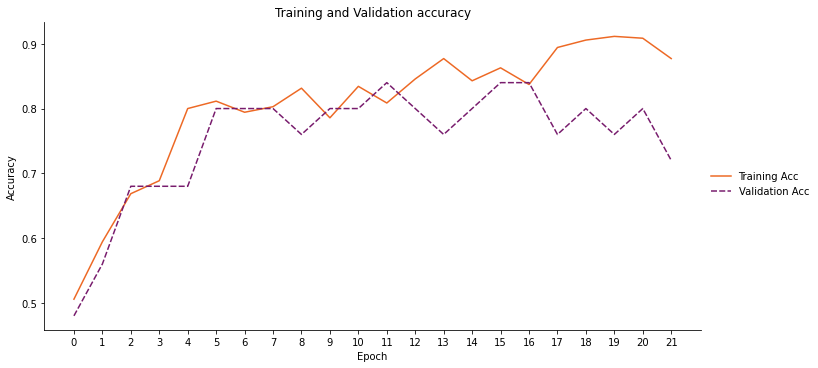

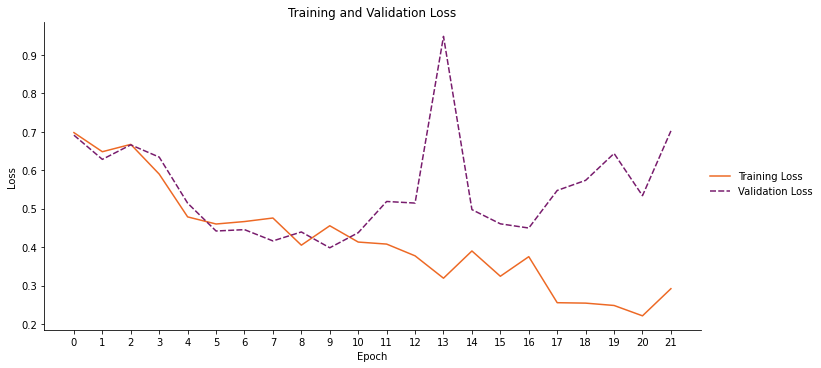

In [ ]:
learning_curves(history_1) #printing the learning accuracy

The accuracy for both training and validation is close to each other as we train for more epochs (from epoch 16 onwards) indicating our model is overfitted. From epoch 16 onwards, the accuracy of the training set is improving whereas the accruacy of the validation set is decreasing which shows that the model beyond 16 epoh is overfitted. The Loss curves aren't as good as we expected them to be. Our validation loss started increasing from 10th epoch, while the training loss keeps decreasing linearly until it reaches nearly 0.

Because we only have relatively few training samples (700), overfitting will be a major concern. Further, this being our baseline model, we have not tried to mitigate overfitting using techinques such as dropout, data augmentation which will be done in the next section.

### **Confusion Matrix**

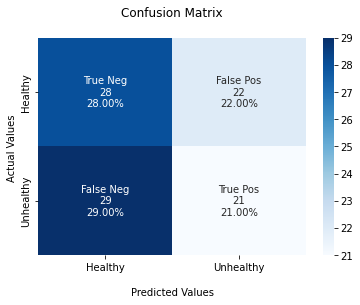


               precision    recall  f1-score   support

     Healthy       0.49      0.56      0.52        50
   Unhealthy       0.49      0.42      0.45        50

    accuracy                           0.49       100
   macro avg       0.49      0.49      0.49       100
weighted avg       0.49      0.49      0.49       100



In [ ]:
evaluation_metric_gen(model_1,test_generator_1) #confusion matrix

The accuracy of the model 1 is 49% which is significantly lower. Since, we don't want our app to predict unhealthy plants as heathly plants, we aim to reduce false negatives as much as possible. Our target is to focus on the precision of the unhealthy plants.

An important thing to note is that the accuracy here is based on precision and recall and the accuracy while fitting is actually the Root Mean Square Error.

### **RMSE**

In [ ]:
test_loss_1, test_acc_1 = model_1.evaluate(test_generator_1, steps=10) #printing the test loss
test_acc_1 = round(test_acc_1,5)
val_acc_1  = round(max(history_1.history['val_acc']),5)

10/10 [==============================] - 1s 149ms/step - loss: 0.3981 - acc: 0.8200


In [ ]:
print('Validation Accuracy: %s  \nTest Accuracy: %s' % (val_acc_1,test_acc_1)) #rounding to get the test and validation

Validation Accuracy: 0.84  
Test Accuracy: 0.82


The accuracy of the model 1 at validation set is 84% and on test set is 82% which shows that the model is overfitted. 

### **Save Model Accuracy**

In [ ]:
## Making a dataframe for model comparision
comparision_df = pd.DataFrame(columns = ['Model', 'Val_Acc', 'Test_Acc'], 
                   index = ['1', '2', '3'])

In [ ]:
## Saving in the comparisions dataframe
comparision_df.loc['1'] = ['Base Model',val_acc_1*100 , test_acc_1*100]  

# **Model_2 with Data Augmentation**

Data augmentation is a technique that uses transformations like image rotation, scaling to increase the diversity of your training set. In this project, we try to use the data augumentation by rotating, flipping, zooming, and shifting the image . In data-constrained contexts, data augmentation is an efficient way to increase the performance and accuracy of models. Data augmentation techniques are commonly used in image recognition and natural language processing models. Data augmentation is also used in the different areas to apply transformations to pictures and provide variety to datasets. From the challenges faced, We must develop tools to assess the quality of enhanced datasets. As the usage of data augmentation methods grows, so will the need to analyze the output quality. If an actual dataset has biases, then data enhanced from it will have biases as well. As a result, determining the best data augmentation approach is critical.



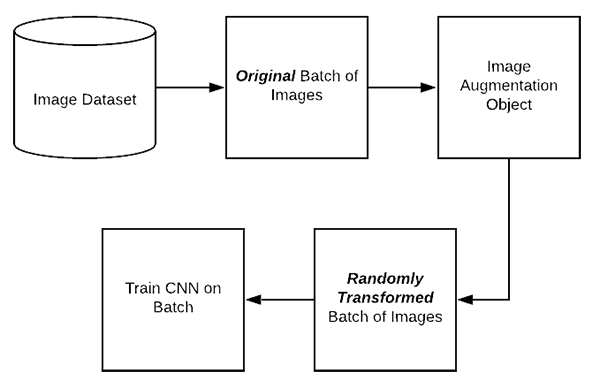

## Architecture 

In [ ]:
# Architecture of the model
model_2 = models.Sequential()
model_2.add(layers.Conv2D(32, (3, 3), activation='relu',  #input layer with image of size 150*150 with 3 channels (RGB)
                        input_shape=(150, 150, 3)))
model_2.add(layers.MaxPooling2D((2, 2)))                       #Maxpooling Layer
model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))      #Convolution layer 
model_2.add(layers.MaxPooling2D((2, 2)))                       
model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))      
model_2.add(layers.MaxPooling2D((2, 2)))                       
model_2.add(layers.Conv2D(128, (3, 3), activation='relu'))     
model_2.add(layers.MaxPooling2D((2, 2)))                       
model_2.add(layers.Conv2D(128, (3, 3), activation='relu'))     
model_2.add(layers.MaxPooling2D((2, 2)))                       
model_2.add(layers.Flatten())                                  # Flattening the layer into a vector
model_2.add(layers.Dropout(0.5))                               #Dropout of 0.5
model_2.add(layers.Dense(512, activation='relu'))              #Dense layer
model_2.add(layers.Dense(1, activation='sigmoid'))

## Compile

In [ ]:
model_2.compile(loss='binary_crossentropy', #For binary classification, loss is binary_crossentropy
              optimizer='Adam',
              metrics=['acc']) 

## Data Preprocessing

In [ ]:
#Data Augmentation
train_datagen_2 = ImageDataGenerator(
    rescale=1./255, #Rescaling the image
    rotation_range=60, #Rotating the image by 60
    width_shift_range=0.2, #Width shift is 0.2
    height_shift_range=0.2, #Height shift is 0.2
    shear_range=0.2,
    zoom_range=0.2, #Zoom Range is 0.2
    horizontal_flip=True, #Horizontal Flip
    fill_mode='nearest')

# Note that the validation data should not be augmented!
# we simply scale it by the max value (255)
test_datagen_2 = ImageDataGenerator(rescale=1./255)
#Train generator
train_generator_2 = train_datagen_2.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
#Validation generator
validation_generator_2 = test_datagen_2.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')
#Test Generator
test_generator_2 = test_datagen_2.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

Found 700 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


Let's see how the images are augmented

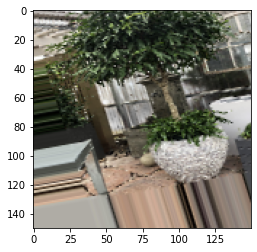

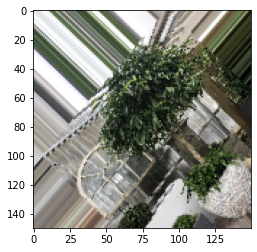

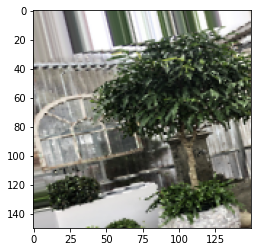

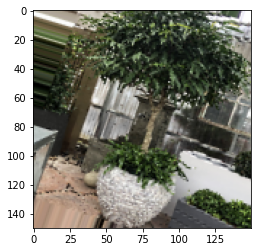

In [ ]:
# We pick one image to "augment"
# Path of the image
img_path = train_dir + '/Healthy/Healthy_5.jpg'

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in train_datagen_2.flow(x, batch_size=1): #Different images augmented in train_generator
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

Let's train our network using data augmentation and dropout:

## Fit Model

In [ ]:
# Early stopping helps to stop training model once it stops improving
es = EarlyStopping(monitor='val_acc', mode='max', #monitoring the validation accuracy to obtain max
                   patience=10, 
                   verbose=1,
                   restore_best_weights=True)


history_2 = model_2.fit( #Fit model
      train_generator_2,
      steps_per_epoch=70, # We have 700 images in training with a batch size of 10, 700/10= 70)
      epochs=100, #Iterating the model through 100 epochs
      validation_data=validation_generator_2,
      validation_steps=5, #Validation steps
      callbacks=[es]) #Callback function early stopping

Epoch 1/100
70/70 [==============================] - 29s 396ms/step - loss: 0.6745 - acc: 0.5643 - val_loss: 0.6071 - val_acc: 0.7800
Epoch 2/100
70/70 [==============================] - 28s 408ms/step - loss: 0.6062 - acc: 0.7257 - val_loss: 0.4107 - val_acc: 0.9400
Epoch 3/100
70/70 [==============================] - 28s 397ms/step - loss: 0.5874 - acc: 0.7414 - val_loss: 0.4076 - val_acc: 0.8200
Epoch 4/100
70/70 [==============================] - 27s 389ms/step - loss: 0.4994 - acc: 0.7771 - val_loss: 0.5464 - val_acc: 0.7800
Epoch 5/100
70/70 [==============================] - 27s 388ms/step - loss: 0.5035 - acc: 0.7786 - val_loss: 0.4933 - val_acc: 0.8000
Epoch 6/100
70/70 [==============================] - 28s 400ms/step - loss: 0.5016 - acc: 0.7771 - val_loss: 0.4873 - val_acc: 0.8600
Epoch 7/100
70/70 [==============================] - 27s 388ms/step - loss: 0.4571 - acc: 0.8100 - val_loss: 0.4706 - val_acc: 0.8600
Epoch 8/100
70/70 [==============================] - 27s 388ms

Let's save our model -- we will be using it in the section on convnet visualization.

In [ ]:
model_2.save('/content/drive/Shareddrives/Deep Learning Team Project/CNN/model_2.h5') #Saving the model

## **Evaluation Metrics**

### **Learning Curves**

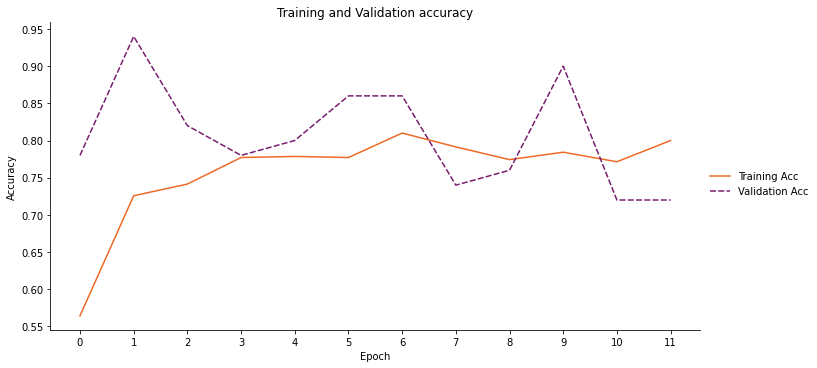

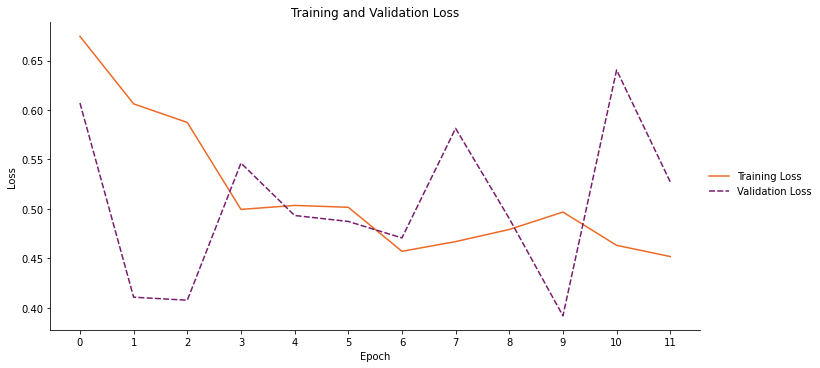

In [ ]:
learning_curves(history_2) #Learning Curve for the model_2

The accuracy for both training and validation is close to each other with the accuracy of the validation set being more than the accuracy of the trainnig set. This suggest that our model is not overfitted. The accruacy of the model didn't improve after 11 epoch and therefore the we stopped fitting the model using early stopping. 
 
Further, training loss is reducing to 0 as we increase the epoch.  



### **Confusion Matrix**

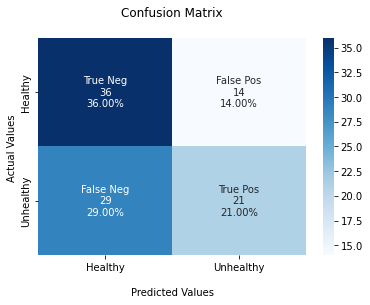


               precision    recall  f1-score   support

     Healthy       0.55      0.72      0.63        50
   Unhealthy       0.60      0.42      0.49        50

    accuracy                           0.57       100
   macro avg       0.58      0.57      0.56       100
weighted avg       0.58      0.57      0.56       100



In [ ]:
evaluation_metric_gen(model_2,test_generator_2) #Confusion matrix using custom function

The accuracy of the model 2 is 57% which is better than model 1. The precision of unhealthy plant is 60% which is better than the model 1. This certainly makes sense as we have mitigated overfitting using dropout and data augmentation techniques.

### **RMSE**

In [ ]:
test_loss_2, test_acc_2 = model_2.evaluate(test_generator_2, steps=10) #Calculating test loss and test accuracy
test_acc_2 = round(test_acc_2,5) #rounding the test accuracy 
val_acc_2  = round(max(history_2.history['val_acc']),5) #rounding the validation accuracy

10/10 [==============================] - 2s 227ms/step - loss: 0.5060 - acc: 0.7900


In [ ]:
print('Validation Accuracy: %s  \nTest Accuracy: %s' % (val_acc_2,test_acc_2)) #Printing Validation and Test Accuracy

Validation Accuracy: 0.94  
Test Accuracy: 0.79


The model with Data Augmentation attained a validation accuracy of 94%

### **Save Model Accuarcy**

In [ ]:
comparision_df.loc['2'] = ['Data Augmentation',val_acc_2*100 , test_acc_2*100]  #Saving the accuarcy in the dataframe

# **Leveraging Pre-trained models**

**Transfer Learning/ feature Extraction**

As we know, machine learning and deep learning models perform better when they are trained on as many data points as possible. The notion here is that for a small dataset, we can leverage a ConvNet that has already been trained on larger datasets and has learnt spatial features as well as texture, and build a model which can generalise well even with limited data

For our project we will try the MobileNetV2 model as this model was trained keeping the processing power of mobiles in mind. Our aim is to allow people to use our model at their home to check their plpants health. With this in mind, it is infinitely more practical to train a model that would be supported on a hand held device rather than a computer or laptop  


### **MobileNetV2**

 MobileNetV2 is a next generation mobile vision application which is a significant improvement over MobileNetV1 and pushes the state of the art for mobile visual recognition including classification, object detection and semantic segmentation. MobileNetV2 is released as part of TensorFlow-Slim Image Classification Library (Sandler et.al, 2019).

 >Link:- MobileNetV2: Inverted Residuals and Linear Bottlenecks (CVPR 2018)
* https://arxiv.org/abs/1801.04381

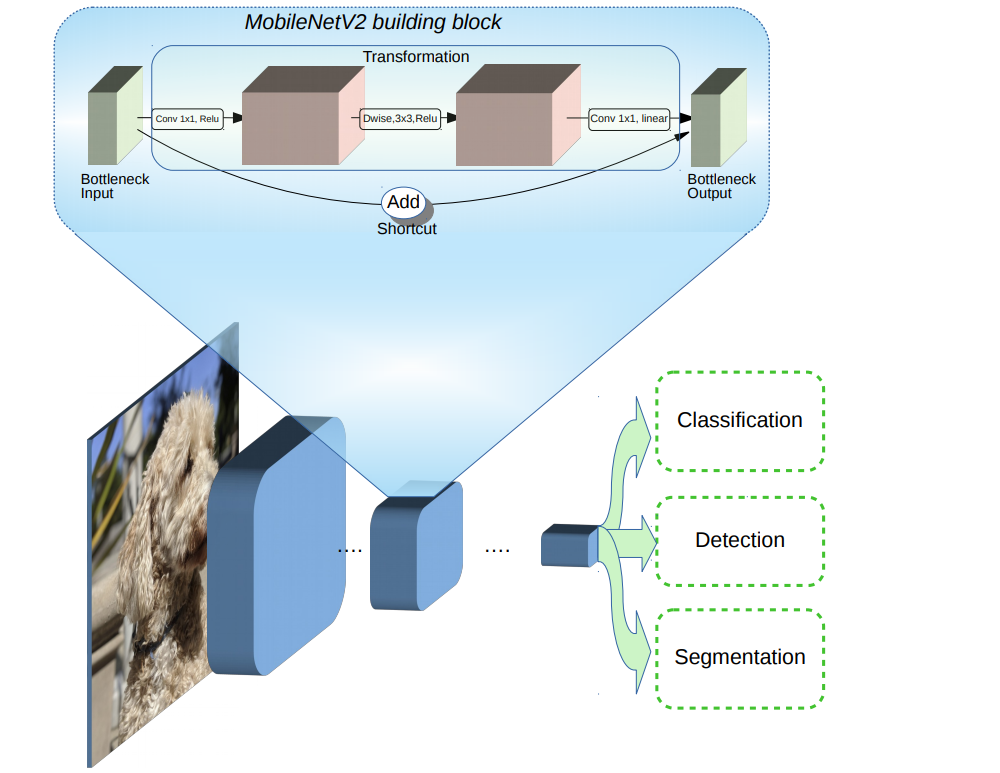

Here is an article explaining the significance of light weight models such as the MobileNet and MobileNetV2

>Link : - https://towardsdatascience.com/review-mobilenetv2-light-weight-model-image-classification-8febb490e61c

In [ ]:
## Getting the Pretrained model
mobnet_base_3 = tf.keras.applications.MobileNetV2(weights='imagenet', 
                  include_top=False, 
                  input_shape=(160 , 160, 3)) 

9420800/9406464 [==============================] - 0s 0us/step


**Note**
 
 We get a warning as:-
 
 WARNING:tensorflow:`input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.

Hence we are using 160x 160 size

In [ ]:
mobnet_base_3.summary() #printing summary

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

### **Architecture**

In [ ]:
## Define our architecture
model_3 = models.Sequential()
model_3.add(mobnet_base_3)
model_3.add(layers.Flatten())
model_3.add(layers.Dense(256, activation='relu'))
model_3.add(layers.Dropout(0.5))
model_3.add(layers.Dense(1, activation='sigmoid'))

### **Important Note on Experimentations**

We have tried model without drop out and then addinng drop out after the flatten layer and then after the dense layer as part of our experimentation. Though accuracy was higher when we did not have any dropouts, there was still some overfitting **(train - 98%, Validation - 90%)**. But with the model with dropout layer after the dense layer and before output layer, we had accuracy close for the train and validation as below  

In [ ]:
#printig results
print('This is the number of trainable weights '
      'before freezing the mobnet base:', len(model_3.trainable_weights))
mobnet_base_3.trainable = False
print('This is the number of trainable weights '
      'after freezing the mobnet base:', len(model_3.trainable_weights))

This is the number of trainable weights before freezing the mobnet base: 160
This is the number of trainable weights after freezing the mobnet base: 4


In [ ]:
model_3.summary() #printing summary

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_1 (Flatten)         (None, 32000)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               8192256   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 10,450,497
Trainable params: 8,192,513
Non-trainable params: 2,257,984
___________________________________

### **Compile**

In [ ]:
#compiling the model
model_3.compile(loss='binary_crossentropy', # Since 2 classes
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

### **Data preprocessing**


In [ ]:
# Data Augmentation
train_datagen_3 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Note that the validation data should not be augmented!
# we simply scale it by the max value (255)
test_datagen_3 = ImageDataGenerator(rescale=1./255)

train_generator_3 = train_datagen_3.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 160x160
        target_size=(160, 160),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator_3 = test_datagen_3.flow_from_directory(
        validation_dir,
        target_size=(160, 160),
        batch_size=10,
        class_mode='binary')

test_generator_3 = test_datagen_3.flow_from_directory(
        test_dir,
        target_size=(160, 160),
        batch_size=10,
        class_mode='binary')

Found 700 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


### **Fit Model**

In [ ]:
es = EarlyStopping(monitor='val_acc', mode='max', 
                   patience=10, 
                   verbose=1,
                   restore_best_weights=True) #implementing early stopping for the best result

history_3 = model_3.fit(
      train_generator_3,
      steps_per_epoch=70, # this will take batches of size 10
      epochs=100, 
      callbacks= [es],
      validation_data=validation_generator_3,
      validation_steps=20, # same, batches of size 10
      verbose=1)

Epoch 1/100
70/70 [==============================] - 40s 505ms/step - loss: 0.8098 - acc: 0.7043 - val_loss: 0.4384 - val_acc: 0.8300
Epoch 2/100
70/70 [==============================] - 32s 454ms/step - loss: 0.5566 - acc: 0.7771 - val_loss: 0.3610 - val_acc: 0.8650
Epoch 3/100
70/70 [==============================] - 30s 435ms/step - loss: 0.4661 - acc: 0.8214 - val_loss: 0.3755 - val_acc: 0.8350
Epoch 4/100
70/70 [==============================] - 38s 550ms/step - loss: 0.4284 - acc: 0.8429 - val_loss: 0.3160 - val_acc: 0.8700
Epoch 5/100
70/70 [==============================] - 37s 524ms/step - loss: 0.3549 - acc: 0.8600 - val_loss: 0.4445 - val_acc: 0.8150
Epoch 6/100
70/70 [==============================] - 32s 456ms/step - loss: 0.3110 - acc: 0.8757 - val_loss: 0.3289 - val_acc: 0.8800
Epoch 7/100
70/70 [==============================] - 31s 447ms/step - loss: 0.3026 - acc: 0.8814 - val_loss: 0.4123 - val_acc: 0.8650
Epoch 8/100
70/70 [==============================] - 32s 455ms

In [ ]:
# Save Model
model_3.save('/content/drive/Shareddrives/Deep Learning Team Project/CNN/model_3.h5')

### **Evaluation Metrics** 

#### **Learning Curves**

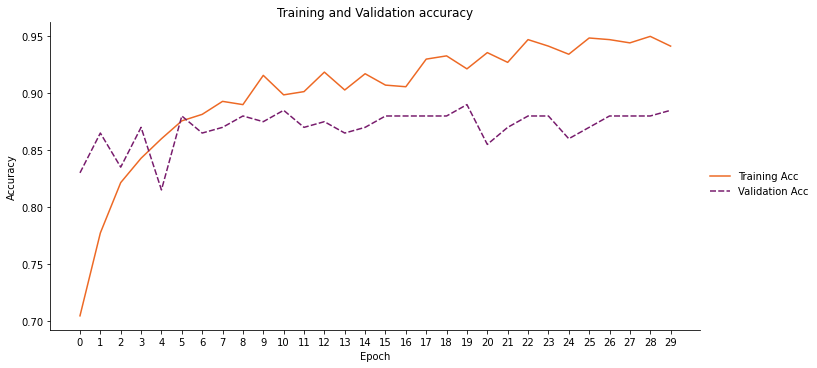

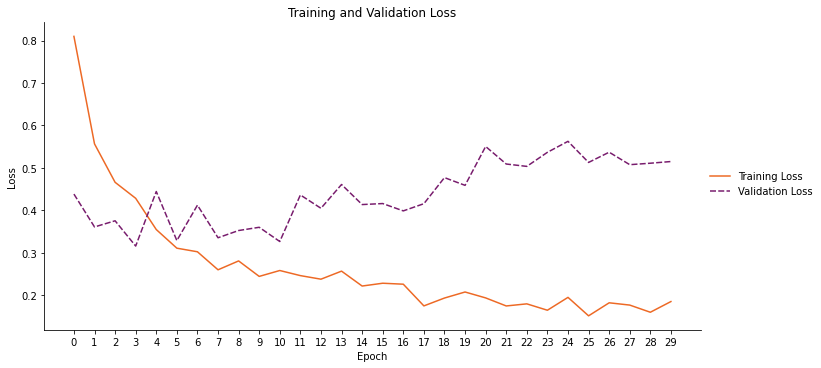

In [ ]:
learning_curves(history_3) #printing learning curve

>The accuracy for both training and validation is close to each other as we train for more epochs indicating our model is not overfitting the training data. When we tried the same model with a dropout layer, we were getting a significant divergence between the accuracy curve.

>The Loss curves aren't as good as we expected them to be. After the 15 epoch there seems to be an increase in validation loss. If we monitored validation loss we might have converged around 10th epoch rather than 20th epoch for validation accuracy



#### **Confusion Matrix**

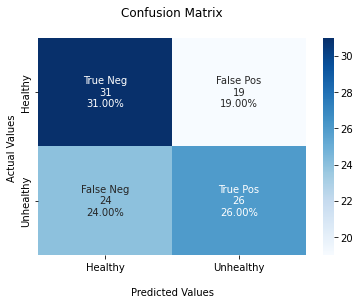


               precision    recall  f1-score   support

     Healthy       0.56      0.62      0.59        50
   Unhealthy       0.58      0.52      0.55        50

    accuracy                           0.57       100
   macro avg       0.57      0.57      0.57       100
weighted avg       0.57      0.57      0.57       100



In [ ]:
evaluation_metric_gen(model_3,test_generator_3) #confusion matrix from custom function

The accuracy of the model 3 is 57% which is similar to model 2. The precision of unhealthy plant is 58% which is a little lower to model 2. 

Important thing to note that the accuracy here is based on precision and recall and the accuracy while fitting is actually the Root Mean Square Error

Additionally, when we fit the model locally we achieved an accuracy of 60% for the test data and the precision of unhealthy plants was 61%. Unfortunately because of the nature of Data Generators, it is difficult to replicate these performances as it relies on random sampling from the test set.


#### **RMSE**

In [ ]:
test_loss_3, test_acc_3 = model_3.evaluate(test_generator_3, steps=10) #computing loss
test_acc_3 = round(test_acc_3,5)
val_acc_3  = round(max(history_3.history['val_acc']),5)

10/10 [==============================] - 2s 233ms/step - loss: 0.1932 - acc: 0.9500


In [ ]:
print('Validation Accuracy: %s  \nTest Accuracy: %s' % (val_acc_3,test_acc_3))

Validation Accuracy: 0.89  
Test Accuracy: 0.95


The accuracy of the model 3 at validation set is 89% and on test set is 95% which is better compared to the other two models

#### **Save Model Accuracry**

In [ ]:
comparision_df.loc['3'] = ['MobileNetV2 Transfer Learning',val_acc_3*100 , test_acc_3*100]  #saving results in a df

# **Compare All Models**

In [ ]:
# Print our comparision dataframe
comparision_df

,Model,Val_Acc,Test_Acc
1,Base Model,84.0,82.0
2,Data Augmentation,94.0,79.0
3,MobileNetV2 Transfer Learning,89.0,95.0


Since, we want to identify as much unhealthy plants as possible, our target is to reduce the number of false neagtives and increase the precision of unhealthy plants.
Based on the above problem and after analyzing the above models, we can infer that 

1.   Based on confusion matrix, Baseline model had the lowest precision for unhealthy plants and the lowest model accuracy. Further the model was overfitted as we didn't use any techniques to mitigate overfitting.

2.   Model 2 and model 3 were giving same model accuracy in the confusion matrix. The precision to predict unhealthy plants for model 2 and model 3 is 60% and 58% respectivey. The precision to predict unhealthy plants is a little better in model 2. Both model 2 and model 3 didn't have any overfitting. 

3. The test accuracy of model 2 and model 3 is 79% and 95% respectively which states that model 3 is able to generalize better on external out of sample data.  





## **Comments on models and Final Conclusion**

1. We want to predict as much unhealthy plants as possible and therefore, we should reduce the number of false negatives. If the number of false negatives doesn't reduces or the precision of unhealthy plants doesn't increase, it means that our customers will be suggested unhealthy plants as healthy plants. This would not be profitable for our application as we will loose customers trust and experience which would result in customer loss. Our team has come to a conclusion to go forward with model 3. Even though we had a lower accuracy on this model than model 2, it is able to generalize better on external out of sample data.

2. Our model classification model is able to classify if a plant is healthy or unhealthy with a 95% accuracy, which is very high. By looking at differentiating factors in the image classes, our model is able to effectively predict if a plant is dying. This is important as many plants that are almost dying, through remedies, can be retrived. With an accurate classification, novice plant owners are now able to understand the steps that result in a plant condition. These plant owners now will be more pro-active.

3. As an extension to our business case, we want to gamify this process. Once the model identifies that a plant is alive, the app will suggest additional ways to keep it healthy. Following the same thought, if the model identifies the plant as dead or unhealthy, it will send notifcations and tips to the user to follow up on their actions. Users can take pictures on a daily basis to track their progress and see the journey of their plants.

5. Along with individual progress, the application will also give users the option connect with other plant owners and build a community of people with similar interests. For instance, similar species plant owners form a community and share their experiences that may be helpful to others.

8. However, the deep convolutional neural network performed well, there are certain limitations that needs to be addressed in future. The model could have performed better, there might be noisy images which will decrease the accuracy of the model (Lau et.al, 2021). Inorder to overcome this issue, we propose to implement noise robust convolutional neural network and WaveCNet to improve accuracy of deep convolutional neural network (Li et.al, 2021).

# References



1.   Angel M. Dzhambov, Peter Lercher, Matthew H.E.M. Browning, Drozdstoy Stoyanov, Nadezhda Petrova, Stoyan Novakov, Donka D. Dimitrova,
Does greenery experienced indoors and outdoors provide an escape and support mental health during the COVID-19 quarantine?,
Environmental Research,
Volume 196,
2021,
110420,
ISSN 0013-9351,
https://doi.org/10.1016/j.envres.2020.110420.
(https://www.sciencedirect.com/science/article/pii/S0013935120313177)
2.  Ruowei Xiao, Zhanwei Wu, Juho Hamari, "Internet-of-Gamification: A Review of Literature on IoT-enabled Gamification for User Engagement", International Journal of Human–Computer Interaction, pp. 1, 2021.
3.  Rawal, Kush and Gabrani, Goldie, IoT based Computing to Monitor Indoor Plants by using Smart Pot (March 28, 2020). Proceedings of the International Conference on Innovative Computing & Communications (ICICC) 2020, Available at SSRN: https://ssrn.com/abstract=3562964 or http://dx.doi.org/10.2139/ssrn.3562964
4.   Gubb, C., Blanusa, T., Griffiths, A. et al. Can houseplants improve indoor air quality by removing CO2 and increasing relative humidity?. Air Qual Atmos Health 11, 1191–1201 (2018). https://doi.org/10.1007/s11869-018-0618-9


5.   Persily A, de Jonge L (2017) Carbon dioxide generation rates for building occupants. Indoor Air 27:868–879. https://doi.org/10.1111/ina.12383
6.   Thomsen JD, Sonderstrup-Andersen HKH, Muller R (2011) People-plant relationships in an office workplace: perceived benefits for the workplace and employees. Hortscience 46:744–752
7. Davidoff, Alexandria, "Relationship between Psychological Stress and Houseplants" (2021). Honors Theses. 51.
https://repository.belmont.edu/honors_theses/51
8. Sirima Panyametheekul, Thanakorn Rattanapun, John Morris, Maneerat Ongwandee,
Foliage houseplant responses to low formaldehyde levels,
Building and Environment,
Volume 147,
2019,
Pages 67-76,
ISSN 0360-1323,
https://doi.org/10.1016/j.buildenv.2018.09.053.
(https://www.sciencedirect.com/science/article/pii/S0360132318306115)
9. Ruey-Yu Chen, Kin-Fai Ho, Gui-Bing Hong, Kai-Jen Chuang,
Houseplant, indoor air pollution, and cardiovascular effects among elderly subjects in Taipei, Taiwan,
Science of The Total Environment,
Volume 705,
2020,
135770,
ISSN 0048-9697,
https://doi.org/10.1016/j.scitotenv.2019.135770.
(https://www.sciencedirect.com/science/article/pii/S0048969719357651)
10. P. N. Pegas, C.A. Alves, T. Nunes, E.F. Bate-Epey, M. Evtyugina & C.A. Pio (2012) Could Houseplants Improve Indoor air Quality in Schools?, Journal of Toxicology and Environmental Health, Part A, 75:22-23, 1371-1380, DOI: 10.1080/15287394.2012.721169

4.   MobileNetV2: Inverted Residuals and Linear Bottlenecks (https://arxiv.org/pdf/1801.04381.pdf)

9. WaveCNet: Wavelet Integrated CNNs to Suppress Aliasing Effect for Noise-Robust Image Classification (https://arxiv.org/abs/2107.13335)

10. Understanding how noise affects the accuracy of CNN image classification (https://dif7uuh3zqcps.cloudfront.net/wp-content/uploads/sites/11/2021/03/15102550/Volume5_Issue2_Paper4_2021.pdf)




